In [1]:
import numpy as np
import script
import matplotlib.pyplot as plt

/Users/Sinead/anaconda/envs/project/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



In [2]:
# set up PathDicom - needed for functions
PathDicom = '/Volumes/Backup Data/ASDH Samples/Sample1/Post-operative/R-N11-109/HeadSpi  1.0  J40s  3'
# http://www.programcreek.com/python/example/65395/vtk.vtkThreshold
reload(script)
thresholded = script.threshim_dicom(0,80)
thresholded_np, ConstPixelSpacing = script.vtk2np(thresholded)
array = script.dicom2np()

In [3]:
thresholded_bone = script.threshim(900,1500)
thresholded_np_bone, ConstPixelSpacing = script.vtk2np(thresholded_bone)
array_bone = script.dicom2np()

AttributeError: 'module' object has no attribute 'threshim'

In [ ]:
x = np.arange(0.0, (thresholded_np.shape[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (thresholded_np.shape[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (thresholded_np.shape[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [ ]:
coords1 = np.array([294.6,272,390.979]) # from find_eyes_PA
coords2 = np.array([267.1,373.97, 298.2]) 

transform = np.array([1/(2*ConstPixelSpacing[2]), 1/(2*ConstPixelSpacing[1]),1])

coords1 = np.multiply(coords1,transform)
coords2 = np.multiply(coords2,transform)

print coords1, coords2

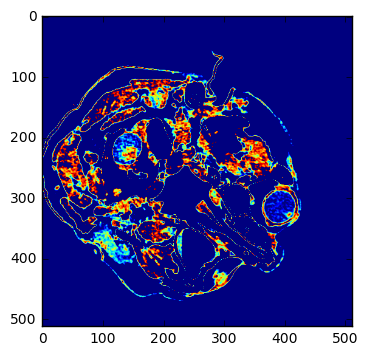

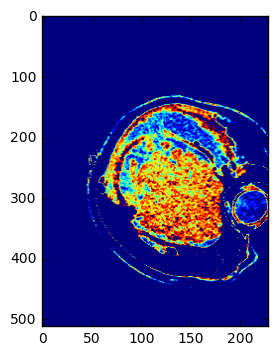

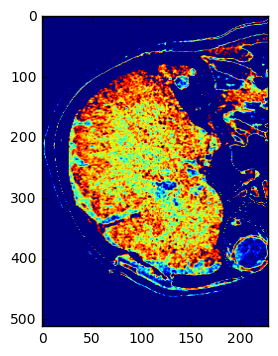

In [19]:
plt.clf()
fig = plt.figure()
plt.imshow(thresholded_np[:,:,210])
ax = fig.add_subplot(111)
plt.show()

fig = plt.figure()
plt.imshow(thresholded_np[:,390,:])
ax = fig.add_subplot(111)
ax.set_aspect(ConstPixelSpacing[0]/ConstPixelSpacing[2])
plt.show()

fig = plt.figure()
plt.imshow(thresholded_np[316,:,:])
ax = fig.add_subplot(111)
ax.set_aspect(ConstPixelSpacing[0]/ConstPixelSpacing[2])
plt.show()

In [20]:
from mpl_toolkits.mplot3d import Axes3D

c1 = np.roll(coords1, -1)
c2 = np.roll(coords2, -1)
print c1, c2

# point that the plane goes through, p
p = (c1+c2)/2

normal = (c2-c1)
normal = normal/np.sum(np.power(normal,2))

# a plane is ax+by+cz = d - find d
d = np.dot(p,normal)

xx = range(0,512,1)
yy = range(0,512,1)
[xx,yy] = np.meshgrid(xx,yy)
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

print p
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, z)
# plt.show()

[ 316.50909091  390.979       210.44325078] [ 435.16509091  298.2         190.79902337]
[ 375.83709091  344.5895      200.62113708]


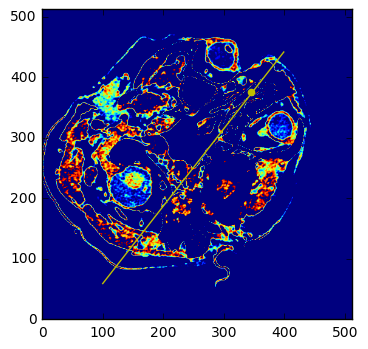

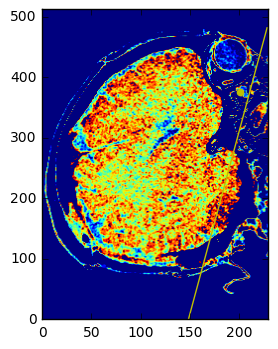

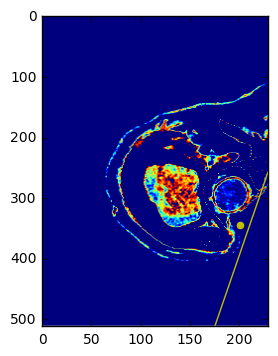

In [21]:
# superpose plane onto slices
a = normal[0]
b = normal[1]
c = normal[2]
# plane equation is ax+by+cz = d
# for each slice substitute slice number into z to get equation

slice_no = 200
# numpy_array=thresholded_np[:,:,slice_no]
# skull = np.nonzero(numpy_array) # use imshow
fig.clf()
fig = plt.figure()
plt.imshow(thresholded_np[:,:,slice_no])
ax = fig.add_subplot(111)
ax.set_aspect(1)
xx = np.arange(100,400,1)
plt.plot(xx, (d-c*slice_no-b*xx)/a, color='y')
plt.scatter(p[1], p[0], color='y')
plt.xlim([0,512])
plt.ylim([0,512])
plt.show()

slice_no = 298
# numpy_array=thresholded_np[:,:,slice_no]
# skull = np.nonzero(numpy_array) # use imshow
fig.clf()
fig = plt.figure()
plt.imshow(thresholded_np[:,slice_no,:])
ax2 = fig.add_subplot(111)
ax2.set_aspect(ConstPixelSpacing[1]/ConstPixelSpacing[2])
xx = np.arange(0,229,1)
plt.plot(xx, (d-b*slice_no-c*xx)/a, color='y')
plt.scatter(p[2], p[0], color='y')
plt.xlim([0,229])
plt.ylim([0,512])
plt.show()


slice_no = 435
# numpy_array=thresholded_np[:,:,slice_no]
# skull = np.nonzero(numpy_array) # use imshow
fig.clf()
fig = plt.figure()
plt.imshow(thresholded_np[slice_no,:,:])
ax2 = fig.add_subplot(111)
ax2.set_aspect(ConstPixelSpacing[1]/ConstPixelSpacing[2])
xx = np.arange(170,230,1)
plt.plot(xx,(d-a*slice_no-c*xx)/b, color='y')
plt.scatter(p[2], p[1],color='y')
plt.xlim([0,229])
plt.ylim([512,0])
plt.show()

# Get angles

In [31]:
from scipy.ndimage.interpolation import rotate
adj = (d-b*slice_no-c)/a - (d-b*slice_no)/a # opp is 1
angle1rad = np.arctan(1/adj)
angle1 = angle1rad/(2*np.pi)*360
rotated1 = rotate(thresholded_np, angle1, mode='nearest', axes=(2,0))

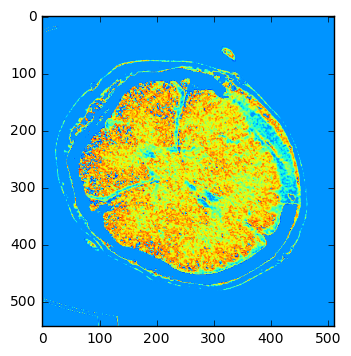

In [32]:
plt.imshow(rotated1[:,:,180])
plt.show()

In [33]:
opp = (d-c*slice_no-b)/a - (d-c*slice_no)/a # adj is 1
angle2rad = np.arctan(opp)
angle2 = angle2rad/(2*np.pi)*360
rotated2 = rotate(rotated1, angle2*(1-np.sin(angle1rad)), mode='nearest', axes=(0,1))

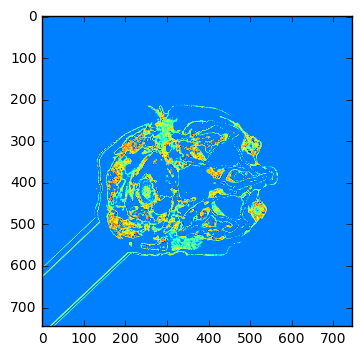

In [40]:
plt.imshow(rotated2[:,:,275])
plt.show()

In [44]:
print angle1
print angle2

9.40040137094
51.9775866119
